# Generating deterministic model with different revenue rates


### Running Deterministic Optimization

In [1]:
import numpy as np
state_space = np.linspace(5,7,50)
fr_universe = list(np.exp(state_space)/1000)


In [2]:
#fr_universe = list(np.linspace(np.exp(5)/1000,np.exp(7)/1000,50))
#state_space = np.array(np.log(fr_universe*1000))

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from Logistics_stoch import CShip
from Logistics_stoch import CRoundtrip
from Logistics_stoch import CJourney
from Logistics_stoch import CPort
import deterministic_opt_func as det_opt

oJourney = CJourney(NrOfRoundtrips = 1,
                    LegsPerRoundtrip = 2,
                    OpprtCostCapitalRate = 0.08,
                    DailyHire_USDperDay = 30000,
                    FutureProfitPotential_USDperDay = 0) #12968


oShip = CShip(Vmin=10, 
              Vmax=17, 
              DWTscantling=157880, 
              DWTdesign=145900, 
              Lightweight=49000, 
              k=0.00000391, 
              p=381, 
              g=3.1, 
              a=0.666667, 
              ShipDischargeRate=3000, 
              BallastCapacity=54500,
              MinFillRateShip=0.3,
              AuxFuelConsumption_TonnePerDay=5)

results = {}
for fr in fr_universe:
    print("Running for Freight Rate of: " + str(fr))
    
    oPortList = []

    df_data = pd.read_excel('journey_data.xlsx',sheet_name='Ports')

    for i in range(0,oJourney.LegsPerRoundtrip+1):
        for index,row in df_data.iterrows():
            v_name = row['Variable']
            v_value = row[i]
            #print("Loading from excel, leg:"+str(i)+", Executing statement("+str(v_name)+"="+str(v_value)+")")
            exec(v_name + '=' + str(v_value))


        oPort = CPort(PortNr=i, 
                      DistancePreviousPort_nm=DistancePreviousPort_nm,
                      LoadingRate_QbmetresperHr=LoadingRate_QbmetresperHr,
                      WaitingTime_Hrs=WaitingTime_Hrs,              
                      CargoIntake_Barrels=CargoIntake_Barrels,
                      CargoIntake_QBmetresperBarrel=CargoIntake_QBmetresperBarrel,
                      CargoIntake_QbmetresPerTonne=CargoIntake_QbmetresPerTonne,
                      FixedPortAccessCosts_USD = FixedPortAccessCosts_USD,
                      UnloadingCharge_USDperHr = UnloadingCharge_USDperHr,
                      LoadingCharge_USDperHr = LoadingCharge_USDperHr,
                      CargoRevenueRate_USDperBarrelper1000nm = fr, # CargoRevenueRate_USDperBarrelper1000nm,
                      MainBunkerRate_USDperBarrel = MainBunkerRate_USDperBarrel,
                      MainBunker_QBmetresperBarrel = MainBunker_QBmetresperBarrel,
                      MainBunker_QbmetresPerTonne = MainBunker_QbmetresPerTonne,
                      AuxFuelRate_USDperTonne = AuxFuelRate_USDperTonne,
                      UnloadingCosts_USD = UnloadingCosts_USD,
                      LoadingCosts_USD = LoadingCosts_USD,
                      CargoIntake_Tonne = CargoIntake_Tonne,
                      UnloadingTime_Hrs = UnloadingTime_Hrs,
                      LoadingTime_Hrs = LoadingTime_Hrs,
                      LegRevenue_Barrels = LegRevenue_Barrels,
                      LegRevenue_USD = LegRevenue_USD)

        oPortList.append(oPort)

    oRTList_det = det_opt.run_deterministic_opt(oJ=oJourney,
                                                oS=oShip,
                                                oPL=oPortList)
    results[fr] = oRTList_det
# storing solution in the journey object
oJourney.oRTList_det = oRTList_det


Running for Freight Rate of: 0.1484131591025766
********* Running CalculateCargoImplicationsData
i=0
oPList[i].CargoIntake_Barrels=1200000.0
i=1
oPList[i].CargoIntake_Barrels=1200000.0
i=2
oPList[i].CargoIntake_Barrels=1200000.0
RoundtripNr:1
LegNr:2
FutureGoodwill:0.0
2-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:624115.0140739438
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:1
FutureGoodwill:-807689.1523704914
1-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:620865.7099812457
UnloadingCosts_USD:217600.0
oRT(RoundtripNr).RoundtripGoodwill=:-1661062.2054324434
Delta T = 33.918247357536764
Delta T = 33.86266850490196
RoundtripTime_Days:67.78091586243872
   Leg Nr  Days at Sea  Speed(knots)  Roundtrip Time Days
0     0.0    28.384914     12.1734

********* Running CalculateCargoImplicationsData
i=0
oPList[i].CargoIntake_Barrels=1200000.0
i=1
oPList[i].CargoIntake_Barrels=1200000.0
i=2
oPList[i].CargoIntake_Barrels=1200000.0
RoundtripNr:1
LegNr:2
FutureGoodwill:0.0
2-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:626569.1990318163
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:1
FutureGoodwill:-68730.97796993575
1-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:626569.1990318163
UnloadingCosts_USD:217600.0
oRT(RoundtripNr).RoundtripGoodwill=:-190620.86979177973
Delta T = 33.82098436542586
Delta T = 33.82098436542586
RoundtripTime_Days:67.64196873085172
   Leg Nr  Days at Sea  Speed(knots)  Roundtrip Time Days
0     0.0    28.287651     12.215283            67.641969
1     1.0    28.287651   

LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:635276.7050541376
UnloadingCosts_USD:217600.0
oRT(RoundtripNr).RoundtripGoodwill=:2295948.72737578
Delta T = 33.675089877259495
Delta T = 33.744563443053
RoundtripTime_Days:67.4196533203125
   Leg Nr  Days at Sea  Speed(knots)  Roundtrip Time Days
0     0.0    28.141757     12.278610            67.419653
1     1.0    28.211230     12.248373            67.419653
Running for Freight Rate of: 0.3642932531022336
********* Running CalculateCargoImplicationsData
i=0
oPList[i].CargoIntake_Barrels=1200000.0
i=1
oPList[i].CargoIntake_Barrels=1200000.0
i=2
oPList[i].CargoIntake_Barrels=1200000.0
RoundtripNr:1
LegNr:2
FutureGoodwill:0.0
2-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:631522.2981252302
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:1
FutureGoodwill:1324806.448461851
1-!-!-!-!----Leg-----------

********* Running CalculateCargoImplicationsData
i=0
oPList[i].CargoIntake_Barrels=1200000.0
i=1
oPList[i].CargoIntake_Barrels=1200000.0
i=2
oPList[i].CargoIntake_Barrels=1200000.0
RoundtripNr:1
LegNr:2
FutureGoodwill:0.0
2-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:639065.4691066592
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:1
FutureGoodwill:3364202.662638335
1-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:651076.7524939321
UnloadingCosts_USD:217600.0
oRT(RoundtripNr).RoundtripGoodwill=:6640425.117600661
Delta T = 33.41803768382353
Delta T = 33.61256366804534
RoundtripTime_Days:67.03060135186887
   Leg Nr  Days at Sea  Speed(knots)  Roundtrip Time Days
0     0.0    27.884704     12.391800            67.030601
1     1.0    28.079230     1

********* Running CalculateCargoImplicationsData
i=0
oPList[i].CargoIntake_Barrels=1200000.0
i=1
oPList[i].CargoIntake_Barrels=1200000.0
i=2
oPList[i].CargoIntake_Barrels=1200000.0
RoundtripNr:1
LegNr:2
FutureGoodwill:0.0
2-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:650641.850556323
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:1
FutureGoodwill:6559459.014684425
1-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:674317.6410637831
UnloadingCosts_USD:217600.0
oRT(RoundtripNr).RoundtripGoodwill=:12998389.672622252
Delta T = 33.0567751416973
Delta T = 33.42498504040288
RoundtripTime_Days:66.48176018210017
   Leg Nr  Days at Sea  Speed(knots)  Roundtrip Time Days
0     0.0    27.523442     12.554450             66.48176
1     1.0    27.891652     12

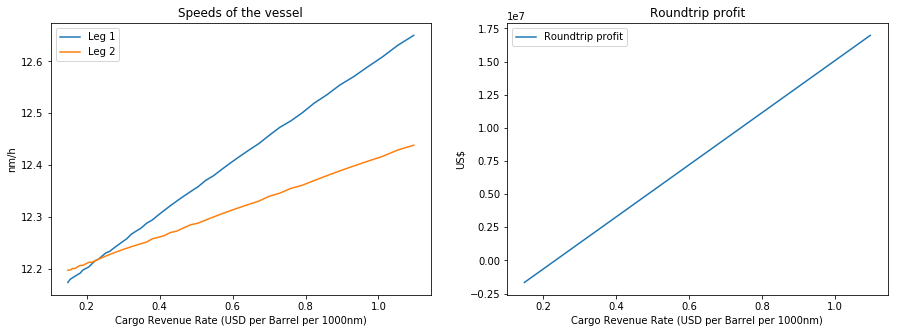

In [4]:
s = np.zeros(shape=(50,5))
#for fr in fr_universe:
import matplotlib.pyplot as plt
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
determ_legs = {}
for leg_nr in range(0,oJourney.LegsPerRoundtrip):
    y = [results[fr][1].oLegList[leg_nr].Speed_kn for fr in fr_universe]
    #y = [results[fr][1].RoundtripGoodwill for fr in fr_universe]
    x = [state_space[fr_universe.index(fr)] for fr in fr_universe]
    x = [fr for fr in fr_universe]
    determ_legs[leg_nr] = (x,y)
    plt.plot(x, y, label='Leg ' + str(leg_nr+1))
    #s[fr_universe.index(fr),leg_nr] = results[fr][1].oLegList[leg_nr].Speed_kn

rt_y = [results[fr][1].RoundtripGoodwill for fr in fr_universe]
rt_x = [fr for fr in fr_universe]


#plt.plot(state_space,s)
plt.xlabel('Cargo Revenue Rate (USD per Barrel per 1000nm)') 
plt.ylabel('nm/h') 
plt.title('Speeds of the vessel')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(rt_x,rt_y,label='Roundtrip profit')
plt.xlabel('Cargo Revenue Rate (USD per Barrel per 1000nm)') 
plt.ylabel('US$') 
plt.title('Roundtrip profit')
plt.legend()

plt.show()


## Running the stochastic optimization

In [20]:
import OU_process
ou_process = OU_process.OU_process(r_bar = 6.2, 
                                   r_lambda=0.5, 
                                   r_sigma=0.2, 
                                   r_start=5.4,
                                   r_end=6.9                              
                                  )

********* Running CalculateCargoImplicationsData
RoundtripNr:1
LegNr:2


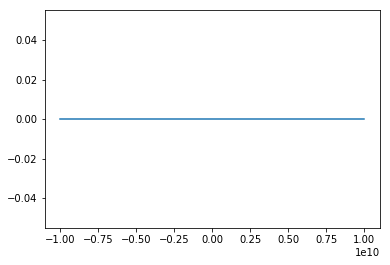

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f322ece03b8>
Starting state:5.4
Ending state:6.9
Running optimization for state: 5.4
Prob space:0.9999999966350405
Prob space:0.9999999966350405
Prob space:0.9999999966350405
Prob space:0.9999998807081381
Prob space:0.9999998807081381
Prob space:0.9999998807081387
Prob space:0.9999999913404506
Prob space:0.9999999913404506
Prob space:0.9999999913404503
Prob space:0.9999999915934246
Prob space:0.9999999915934246
Prob space:0.9999999915934247
Prob space:0.9999999916757342
Prob space:0.9999999916757342
Prob space:0.999999991675734
Prob space:0.9999999917634501
Prob space:0.9999999917634501
Prob space:0.9999999917634499
Prob space:0.9999999917633842
Prob space:0.9999999917633842
Prob space:0.9999999917633839
Prob space:0.9999999917631207
Prob space:0.9999999917631207
Prob space:0.9999999917631207
Prob space:0.999999991763334
Prob space:0.999999991763334
Prob space:0.9999999917633339
Prob space:0.9999999917633705
Prob space

Prob space:0.9999999991597115
Prob space:0.9999999699221489
Prob space:0.9999999699221489
Prob space:0.999999969922149
Prob space:0.999999998022306
Prob space:0.999999998022306
Prob space:0.999999998022306
Prob space:0.9999999980915002
Prob space:0.9999999980915002
Prob space:0.9999999980915003
Prob space:0.9999999981114636
Prob space:0.9999999981114636
Prob space:0.9999999981114638
Prob space:0.9999999981320362
Prob space:0.9999999981320362
Prob space:0.9999999981320361
Prob space:0.9999999981319335
Prob space:0.9999999981319335
Prob space:0.9999999981319334
Prob space:0.9999999981315224
Prob space:0.9999999981315224
Prob space:0.9999999981315226
Prob space:0.9999999981318084
Prob space:0.9999999981318084
Prob space:0.9999999981318083
Prob space:0.9999999981318866
Prob space:0.9999999981318866
Prob space:0.9999999981318868
Prob space:0.9999999981318866
Running optimization for state: 5.730508474576272
Prob space:0.9999999992520385
Prob space:0.9999999992520385
Prob space:0.99999999925

Prob space:0.9999999997593664
Prob space:0.9999999997593664
Prob space:0.9999999997593664
Prob space:0.9999999997620568
Prob space:0.9999999997620568
Prob space:0.9999999997620567
Prob space:0.9999999997619877
Prob space:0.9999999997619877
Prob space:0.9999999997619878
Prob space:0.9999999997619877
Running optimization for state: 6.213559322033898
Prob space:0.9999999998440394
Prob space:0.9999999998440394
Prob space:0.9999999998440392
Prob space:0.9999999944534321
Prob space:0.9999999944534321
Prob space:0.9999999944534321
Prob space:0.9999999997536493
Prob space:0.9999999997536493
Prob space:0.9999999997536492
Prob space:0.99999999976382
Prob space:0.99999999976382
Prob space:0.9999999997638199
Prob space:0.9999999997663774
Prob space:0.9999999997663774
Prob space:0.9999999997663773
Prob space:0.9999999997688757
Prob space:0.9999999997688757
Prob space:0.9999999997688758
Prob space:0.999999999768884
Prob space:0.999999999768884
Prob space:0.9999999997688843
Prob space:0.9999999997689

Prob space:0.9999999999973319
Prob space:0.999999999997332
Prob space:0.9999999995449309
Prob space:0.9999999995449309
Prob space:0.9999999995449309
Prob space:0.9999999995282062
Prob space:0.9999999995282062
Prob space:0.9999999995282061
Prob space:0.9999999995246192
Prob space:0.9999999995246192
Prob space:0.999999999524619
Prob space:0.9999999995195068
Prob space:0.9999999995195068
Prob space:0.9999999995195066
Prob space:0.9999999995195389
Prob space:0.9999999995195389
Prob space:0.9999999995195388
Prob space:0.9999999995196676
Prob space:0.9999999995196676
Prob space:0.9999999995196676
Prob space:0.9999999995195525
Prob space:0.9999999995195525
Prob space:0.9999999995195525
Prob space:0.9999999995195525
Running optimization for state: 6.671186440677967
Prob space:0.9999999992462169
Prob space:0.9999999992462169
Prob space:0.9999999992462167
Prob space:0.9999999999970025
Prob space:0.9999999999970025
Prob space:0.9999999999970025
Prob space:0.9999999995152065
Prob space:0.999999999

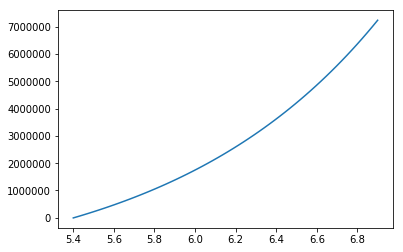

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f322ca59d18>
Starting state:5.4
Ending state:6.9
Running optimization for state: 5.4
Prob space:0.9999999966350405
Prob space:0.9999999966350405
Prob space:0.9999999966350405
Prob space:0.9999998807081381
Prob space:0.9999998807081381
Prob space:0.9999998807081387
Prob space:0.9999999867813865
Prob space:0.9999999867813865
Prob space:0.9999999867813865
Prob space:0.9999999871208141
Prob space:0.9999999871208141
Prob space:0.9999999871208141
Prob space:0.999999987237783
Prob space:0.999999987237783
Prob space:0.999999987237783
Prob space:0.9999999873689417
Prob space:0.9999999873689417
Prob space:0.9999999873689417
Prob space:0.9999999873677738
Prob space:0.9999999873677738
Prob space:0.999999987367774
Prob space:0.9999999873631018
Prob space:0.9999999873631018
Prob space:0.9999999873631021
Prob space:0.999999987366882
Prob space:0.999999987366882
Prob space:0.9999999873668818
Prob space:0.9999999873674084
Prob space:0.

Prob space:0.999999994880424
Prob space:0.999999994880424
Prob space:0.9999999948804239
Prob space:0.999999994880424
Running optimization for state: 5.603389830508475
Prob space:0.9999999986611753
Prob space:0.9999999986611753
Prob space:0.9999999986611753
Prob space:0.9999999521702504
Prob space:0.9999999521702504
Prob space:0.9999999521702505
Prob space:0.9999999952817161
Prob space:0.9999999952817161
Prob space:0.999999995281716
Prob space:0.9999999954300387
Prob space:0.9999999954300387
Prob space:0.9999999954300385
Prob space:0.9999999954749027
Prob space:0.9999999954749027
Prob space:0.9999999954749028
Prob space:0.9999999955225695
Prob space:0.9999999955225695
Prob space:0.9999999955225692
Prob space:0.9999999955243224
Prob space:0.9999999955243224
Prob space:0.9999999955243225
Prob space:0.9999999955243224
Running optimization for state: 5.628813559322034
Prob space:0.9999999988081905
Prob space:0.9999999988081905
Prob space:0.9999999988081905
Prob space:0.9999999573964368
Prob

Prob space:0.9999999987240066
Prob space:0.9999999987240065
Prob space:0.9999999987381882
Prob space:0.9999999987381882
Prob space:0.9999999987381881
Prob space:0.999999998738006
Prob space:0.999999998738006
Prob space:0.9999999987380058
Prob space:0.9999999987381601
Prob space:0.9999999987381601
Prob space:0.9999999987381601
Prob space:0.999999998738175
Prob space:0.999999998738175
Prob space:0.9999999987381749
Prob space:0.9999999987381849
Prob space:0.9999999987381849
Prob space:0.9999999987381849
Prob space:0.9999999987381876
Prob space:0.9999999987381876
Prob space:0.9999999987381878
Prob space:0.999999998738188
Prob space:0.999999998738188
Prob space:0.9999999987381879
Prob space:0.9999999987381881
Prob space:0.9999999987381881
Prob space:0.999999998738188
Prob space:0.9999999987381881
Running optimization for state: 5.857627118644068
Prob space:0.9999999995787637
Prob space:0.9999999995787637
Prob space:0.9999999995787637
Prob space:0.9999999849175697
Prob space:0.99999998491756

Prob space:0.9999999997844268
Prob space:0.9999999997844266
Prob space:0.9999999997844267
Prob space:0.9999999997844267
Prob space:0.9999999997844267
Prob space:0.9999999997844267
Prob space:0.9999999997844267
Prob space:0.9999999997844267
Prob space:0.9999999997844267
Prob space:0.9999999997844267
Prob space:0.9999999997844267
Prob space:0.9999999998368538
Prob space:0.9999999998368538
Prob space:0.999999999836854
Prob space:0.9999999997844422
Prob space:0.9999999997844422
Prob space:0.9999999997844423
Prob space:0.999999999784428
Prob space:0.999999999784428
Prob space:0.9999999997844278
Prob space:0.9999999997844267
Prob space:0.9999999997844267
Prob space:0.9999999997844268
Prob space:0.9999999997844267
Prob space:0.9999999997844267
Prob space:0.9999999997844268
Prob space:0.9999999997844266
Prob space:0.9999999997844266
Prob space:0.9999999997844267
Prob space:0.9999999997844268
Prob space:0.9999999997844268
Prob space:0.9999999997844266
Prob space:0.9999999997844267
Prob space:0.

Prob space:0.9999999999983128
Prob space:0.9999999999983128
Prob space:0.9999999997756946
Prob space:0.9999999997756946
Prob space:0.9999999997756948
Prob space:0.9999999997765623
Prob space:0.9999999997765623
Prob space:0.9999999997765623
Prob space:0.999999999775438
Prob space:0.999999999775438
Prob space:0.999999999775438
Prob space:0.999999999772263
Prob space:0.999999999772263
Prob space:0.9999999997722631
Prob space:0.9999999997723898
Prob space:0.9999999997723898
Prob space:0.9999999997723898
Prob space:0.9999999997723898
Running optimization for state: 6.569491525423729
Prob space:0.9999999995247968
Prob space:0.9999999995247968
Prob space:0.9999999995247968
Prob space:0.9999999999981113
Prob space:0.9999999999981113
Prob space:0.9999999999981111
Prob space:0.9999999997681865
Prob space:0.9999999997681865
Prob space:0.9999999997681865
Prob space:0.9999999997713135
Prob space:0.9999999997713135
Prob space:0.9999999997713135
Prob space:0.9999999997693341
Prob space:0.999999999769

Prob space:0.9999999997358767
Prob space:0.9999999997358767
Prob space:0.9999999997358759
Prob space:0.9999999997358759
Prob space:0.9999999997358762
Prob space:0.9999999997358759
Prob space:0.9999999997358759
Prob space:0.9999999997358762
Prob space:0.9999999997358759
Prob space:0.9999999997358759
Prob space:0.999999999735876
Prob space:0.9999999997358759
Prob space:0.9999999997358759
Prob space:0.9999999997358758
Prob space:0.9999999997358758
Prob space:0.9999999997358758
Prob space:0.9999999997358759
Prob space:0.9999999997358759
Prob space:0.9999999997358759
Prob space:0.9999999997358758
Prob space:0.9999999997358759
Prob space:0.9999999997358759
Prob space:0.9999999997358759
Prob space:0.9999999997358758
Prob space:0.9999999997358758
Prob space:0.9999999997358759
Prob space:0.9999999997358759
Prob space:0.9999999997358759
Prob space:0.9999999997358759
Prob space:0.9999999997358758
Prob space:0.9999999997358758
Prob space:0.9999999997358759
Prob space:0.9999999997358759
Prob space:

In [21]:
from Optimization_Problem import Optimization_Problem
import FFA
op0 = Optimization_Problem(oJourney=oJourney, 
                          oShip=oShip, 
                          oPortList=oPortList, 
                          process=ou_process, 
                          ffa=FFA.FFA(fut_curve_slope = -0.01), 
                          eta=0) # determines how important is the variance of future spot rates)
oRTList0 = op0.run_optimization()

# Display the results



## Value Function ($G$) or Goodwill 

The final value function after all legs and rountrip were calculated from the back.

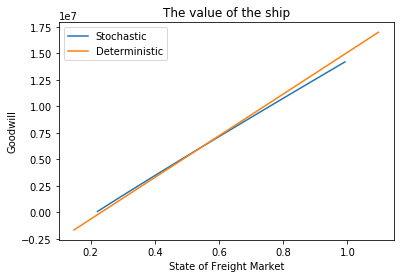

In [22]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter 
x = np.exp(oRTList0[oJourney.NrOfRoundtrips].RoundtripGoodwill.x)/1000
plt.plot(x,
         oRTList0[oJourney.NrOfRoundtrips].RoundtripGoodwill.y,
        label='Stochastic')
plt.plot(rt_x,
         rt_y,
         label='Deterministic')

plt.xlabel('State of Freight Market') 
plt.ylabel('Goodwill') 
plt.title('The value of the ship')
plt.legend()
plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.show()



## Speed trip

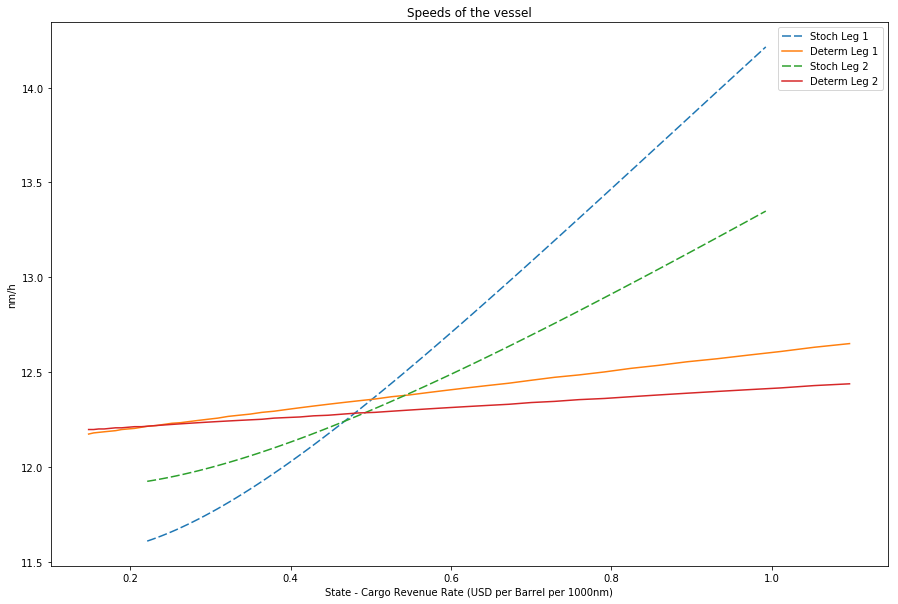

In [23]:
plt.subplots(figsize=(15, 10))
x = np.exp(oRTList0[1].oLegList[0].Speed_kn.x)/1000
for leg_i in range(0,oJourney.LegsPerRoundtrip):
    plt.plot(x,
             oRTList0[1].oLegList[leg_i].Speed_kn.y, 
             label='Stoch Leg ' + str(leg_i+1),
             dashes=[6, 2])
    (x1,y1) = determ_legs[leg_i]
    plt.plot(x1,
             y1, 
             label='Determ Leg ' + str(leg_i+1))
    
plt.xlabel('State - Cargo Revenue Rate (USD per Barrel per 1000nm)') 
plt.ylabel('nm/h') 
plt.title('Speeds of the vessel')
plt.legend()
plt.show()


## Hedge Ratio

IndexError: list index out of range

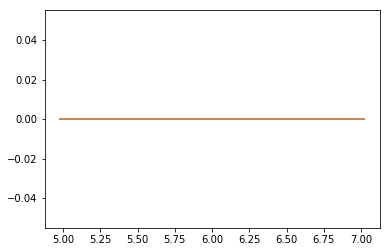

In [11]:
plt.plot(oRTList0[1].oLegList[0].Hedge_Ratio.x,
         oRTList0[1].oLegList[0].Hedge_Ratio.y, 
         label='Leg 5')
plt.plot(oRTList0[1].oLegList[1].Hedge_Ratio.x,
         oRTList0[1].oLegList[1].Hedge_Ratio.y, 
         label='Leg 4')
plt.plot(oRTList0[1].oLegList[2].Hedge_Ratio.x,
         oRTList0[1].oLegList[2].Hedge_Ratio.y, 
         label='Leg 3')
plt.plot(oRTList0[1].oLegList[3].Hedge_Ratio.x,
         oRTList0[1].oLegList[3].Hedge_Ratio.y, 
         label='Leg 2')
plt.plot(oRTList0[1].oLegList[4].Hedge_Ratio.x,
         oRTList0[1].oLegList[4].Hedge_Ratio.y, 
         label='Leg 1')
plt.xlabel('State of Freight Market') 
plt.ylabel('Days') 
plt.legend(loc='upper right')
plt.title('Optimal hedge ratio for each state')
plt.show()

## Changing parameters of the problem:

Assume that the forward rates are discounted by more than previously assumed, in this case hadging is more costly on average, we expect less hedging and decrease of the hedge ratio:

> ffa = FFA.FFA(fut_curve_slope = -0.01)

********* Running CalculateCargoImplicationsData
RoundtripNr:1
LegNr:2


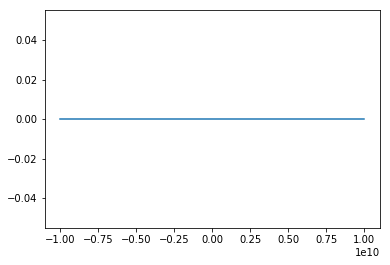

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f322eea5138>
Starting state:5.433643258854092
Ending state:6.966356741145908
Running optimization for state: 5.433643258854092
Prob space:0.9999999996085747
Prob space:0.9999999996085747
Prob space:0.9999999996085747
Prob space:0.999999985993933
Prob space:0.999999985993933
Prob space:0.9999999859939331
Prob space:0.9999999993503977
Prob space:0.9999999993503977
Prob space:0.9999999993503976
Prob space:0.9999999993598022
Prob space:0.9999999993598022
Prob space:0.9999999993598022
Prob space:0.9999999993550622
Prob space:0.9999999993550622
Prob space:0.9999999993550622
Prob space:0.9999999993627082
Prob space:0.9999999993627082
Prob space:0.9999999993627082
Prob space:0.9999999993631352
Prob space:0.9999999993631352
Prob space:0.999999999363135
Prob space:0.9999999993631391
Prob space:0.9999999993631391
Prob space:0.999999999363139
Prob space:0.9999999993631391
Running optimization for state: 5.459621453469207
Prob spac

Prob space:0.9999999993688627
Prob space:0.9999999993688626
Prob space:0.9999999993791227
Prob space:0.9999999993791227
Prob space:0.9999999993791224
Prob space:0.9999999993797849
Prob space:0.9999999993797849
Prob space:0.9999999993797846
Prob space:0.9999999993796517
Prob space:0.9999999993796517
Prob space:0.9999999993796518
Prob space:0.9999999993796517
Running optimization for state: 5.693425205005247
Prob space:0.9999999996085758
Prob space:0.9999999996085758
Prob space:0.9999999996085759
Prob space:0.9999999859939342
Prob space:0.9999999859939342
Prob space:0.9999999859939341
Prob space:0.9999999993595965
Prob space:0.9999999993595965
Prob space:0.9999999993595965
Prob space:0.9999999993982321
Prob space:0.9999999993982321
Prob space:0.9999999993982319
Prob space:0.9999999993706226
Prob space:0.9999999993706226
Prob space:0.9999999993706224
Prob space:0.9999999993813111
Prob space:0.9999999993813111
Prob space:0.9999999993813111
Prob space:0.9999999993816687
Prob space:0.9999999

Prob space:0.9999999994024016
Prob space:0.9999999994024015
Prob space:0.9999999994024016
Running optimization for state: 5.953207151156403
Prob space:0.9999999996085758
Prob space:0.9999999996085758
Prob space:0.9999999996085759
Prob space:0.9999999859939342
Prob space:0.9999999859939342
Prob space:0.9999999859939341
Prob space:0.9999999993645512
Prob space:0.9999999993645512
Prob space:0.9999999993645512
Prob space:0.9999999994536517
Prob space:0.9999999994536517
Prob space:0.9999999994536515
Prob space:0.9999999993980949
Prob space:0.9999999993980949
Prob space:0.9999999993980949
Prob space:0.9999999994045567
Prob space:0.9999999994045567
Prob space:0.9999999994045567
Prob space:0.9999999994049349
Prob space:0.9999999994049349
Prob space:0.9999999994049348
Prob space:0.9999999994049349
Running optimization for state: 5.979185345771518
Prob space:0.9999999996085758
Prob space:0.9999999996085758
Prob space:0.9999999996085759
Prob space:0.9999999859939342
Prob space:0.9999999859939342


Prob space:0.999999999536567
Prob space:0.999999999536567
Prob space:0.9999999994444003
Prob space:0.9999999994444003
Prob space:0.9999999994444003
Prob space:0.9999999994431626
Prob space:0.9999999994431626
Prob space:0.9999999994431628
Prob space:0.9999999994431504
Prob space:0.9999999994431504
Prob space:0.9999999994431505
Prob space:0.9999999994431504
Running optimization for state: 6.31690187576802
Prob space:0.9999999996085758
Prob space:0.9999999996085758
Prob space:0.9999999996085759
Prob space:0.9999999859939342
Prob space:0.9999999859939342
Prob space:0.9999999859939341
Prob space:0.9999999993532568
Prob space:0.9999999993532568
Prob space:0.9999999993532569
Prob space:0.9999999995443335
Prob space:0.9999999995443335
Prob space:0.9999999995443334
Prob space:0.9999999994476099
Prob space:0.9999999994476099
Prob space:0.9999999994476099
Prob space:0.9999999994465216
Prob space:0.9999999994465216
Prob space:0.9999999994465218
Prob space:0.9999999994466581
Prob space:0.9999999994

Prob space:0.9999999859939331
Prob space:0.9999999993042393
Prob space:0.9999999993042393
Prob space:0.9999999993042397
Prob space:0.9999999996530183
Prob space:0.9999999996530183
Prob space:0.9999999996530184
Prob space:0.9999999994860849
Prob space:0.9999999994860849
Prob space:0.9999999994860849
Prob space:0.9999999994924649
Prob space:0.9999999994924649
Prob space:0.999999999492465
Prob space:0.999999999492218
Prob space:0.999999999492218
Prob space:0.9999999994922181
Prob space:0.9999999994922104
Prob space:0.9999999994922104
Prob space:0.9999999994922103
Prob space:0.9999999994921802
Prob space:0.9999999994921802
Prob space:0.9999999994921803
Prob space:0.9999999994922043
Prob space:0.9999999994922043
Prob space:0.9999999994922042
Prob space:0.9999999994921929
Prob space:0.9999999994921929
Prob space:0.9999999994921929
Prob space:0.9999999994922002
Prob space:0.9999999994922002
Prob space:0.9999999994922003
Prob space:0.9999999994921963
Prob space:0.9999999994921963
Prob space:0.

Prob space:0.9999999995128964
Prob space:0.9999999995128964
Prob space:0.9999999995128963
Prob space:0.9999999995437839
Prob space:0.9999999995437839
Prob space:0.9999999995437838
Prob space:0.9999999995427381
Prob space:0.9999999995427381
Prob space:0.9999999995427381
Prob space:0.9999999995427709
Prob space:0.9999999995427709
Prob space:0.9999999995427709
Prob space:0.9999999995427454
Prob space:0.9999999995427454
Prob space:0.9999999995427454
Prob space:0.9999999995427454
Running optimization for state: 6.940378546530793
Prob space:0.9999999996085747
Prob space:0.9999999996085747
Prob space:0.9999999996085747
Prob space:0.999999985993933
Prob space:0.999999985993933
Prob space:0.9999999859939331
Prob space:0.99999999917059
Prob space:0.99999999917059
Prob space:0.9999999991705901
Prob space:0.999999999779501
Prob space:0.999999999779501
Prob space:0.999999999779501
Prob space:0.9999999995144475
Prob space:0.9999999995144475
Prob space:0.9999999995144475
Prob space:0.9999999995488001

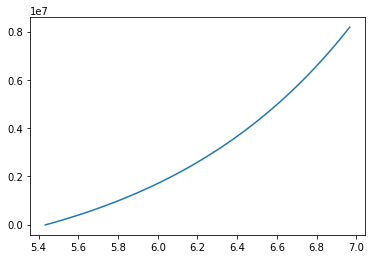

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f322cbbfd18>
Starting state:5.433643258854092
Ending state:6.966356741145908
Running optimization for state: 5.433643258854092
Prob space:0.9999999996085747
Prob space:0.9999999996085747
Prob space:0.9999999996085747
Prob space:0.999999985993933
Prob space:0.999999985993933
Prob space:0.9999999859939331
Prob space:0.9999999993201056
Prob space:0.9999999993201056
Prob space:0.9999999993201056
Prob space:0.9999999993298009
Prob space:0.9999999993298009
Prob space:0.9999999993298007
Prob space:0.9999999993247991
Prob space:0.9999999993247991
Prob space:0.9999999993247993
Prob space:0.9999999993333281
Prob space:0.9999999993333281
Prob space:0.9999999993333282
Prob space:0.9999999993336961
Prob space:0.9999999993336961
Prob space:0.9999999993336961
Prob space:0.9999999993340039
Prob space:0.9999999993340039
Prob space:0.9999999993340039
Prob space:0.9999999993338163
Prob space:0.9999999993338163
Prob space:0.99999999933381

Prob space:0.9999999993487871
Prob space:0.9999999993487871
Prob space:0.9999999993487872
Prob space:0.9999999993487872
Prob space:0.9999999993487874
Prob space:0.9999999993487871
Prob space:0.9999999993487871
Prob space:0.9999999993487871
Prob space:0.9999999993487872
Prob space:0.9999999993487872
Prob space:0.9999999993487871
Prob space:0.9999999993487871
Prob space:0.9999999993487871
Prob space:0.9999999993487871
Prob space:0.9999999993487871
Prob space:0.9999999993487871
Prob space:0.9999999993487871
Prob space:0.9999999993487871
Prob space:0.9999999993487871
Prob space:0.9999999993487871
Prob space:0.9999999993789259
Prob space:0.9999999993789259
Prob space:0.9999999993789259
Prob space:0.9999999993487935
Prob space:0.9999999993487935
Prob space:0.9999999993487936
Prob space:0.999999999348789
Prob space:0.999999999348789
Prob space:0.9999999993487891
Prob space:0.9999999993487878
Prob space:0.9999999993487878
Prob space:0.9999999993487878
Prob space:0.9999999993487875
Prob space:0

Prob space:0.999999999356217
Prob space:0.9999999993562171
Prob space:0.9999999993683095
Prob space:0.9999999993683095
Prob space:0.9999999993683095
Prob space:0.9999999993689068
Prob space:0.9999999993689068
Prob space:0.9999999993689069
Prob space:0.9999999993689024
Prob space:0.9999999993689024
Prob space:0.9999999993689024
Prob space:0.9999999993689069
Prob space:0.9999999993689069
Prob space:0.9999999993689069
Prob space:0.999999999368907
Prob space:0.999999999368907
Prob space:0.999999999368907
Prob space:0.9999999993689069
Prob space:0.9999999993689069
Prob space:0.999999999368907
Prob space:0.9999999993689068
Prob space:0.9999999993689068
Prob space:0.9999999993689069
Prob space:0.9999999993689068
Running optimization for state: 5.7973379834657095
Prob space:0.9999999996085747
Prob space:0.9999999996085747
Prob space:0.9999999996085747
Prob space:0.999999985993933
Prob space:0.999999985993933
Prob space:0.9999999859939331
Prob space:0.999999999342996
Prob space:0.99999999934299

Prob space:0.9999999993555616
Prob space:0.9999999993555616
Prob space:0.9999999994748138
Prob space:0.9999999994748138
Prob space:0.9999999994748141
Prob space:0.9999999994099739
Prob space:0.9999999994099739
Prob space:0.999999999409974
Prob space:0.9999999994107084
Prob space:0.9999999994107084
Prob space:0.9999999994107084
Prob space:0.9999999994109443
Prob space:0.9999999994109443
Prob space:0.9999999994109442
Prob space:0.9999999994109443
Running optimization for state: 6.109076318847096
Prob space:0.9999999996085747
Prob space:0.9999999996085747
Prob space:0.9999999996085747
Prob space:0.999999985993933
Prob space:0.999999985993933
Prob space:0.9999999859939331
Prob space:0.999999999356184
Prob space:0.999999999356184
Prob space:0.9999999993561842
Prob space:0.9999999994819845
Prob space:0.9999999994819845
Prob space:0.9999999994819845
Prob space:0.9999999994155038
Prob space:0.9999999994155038
Prob space:0.9999999994155037
Prob space:0.9999999994146809
Prob space:0.999999999414

Prob space:0.9999999994587935
Prob space:0.9999999994587935
Prob space:0.9999999994582025
Prob space:0.9999999994582025
Prob space:0.9999999994582026
Prob space:0.9999999994583033
Prob space:0.9999999994583033
Prob space:0.9999999994583035
Prob space:0.9999999994582244
Prob space:0.9999999994582244
Prob space:0.9999999994582243
Prob space:0.9999999994582396
Prob space:0.9999999994582396
Prob space:0.9999999994582398
Prob space:0.9999999994582396
Running optimization for state: 6.394836459613367
Prob space:0.9999999996085758
Prob space:0.9999999996085758
Prob space:0.9999999996085759
Prob space:0.9999999859939342
Prob space:0.9999999859939342
Prob space:0.9999999859939341
Prob space:0.9999999993528097
Prob space:0.9999999993528097
Prob space:0.9999999993528098
Prob space:0.9999999995738565
Prob space:0.9999999995738565
Prob space:0.9999999995738565
Prob space:0.9999999994632154
Prob space:0.9999999994632154
Prob space:0.9999999994632156
Prob space:0.9999999994629422
Prob space:0.9999999

Prob space:0.9999999995146576
Prob space:0.9999999995146582
Prob space:0.9999999995146582
Prob space:0.9999999995146582
Prob space:0.9999999995146581
Prob space:0.9999999995146581
Prob space:0.9999999995146583
Prob space:0.9999999995146583
Prob space:0.9999999995146583
Prob space:0.9999999995146582
Prob space:0.9999999995146581
Prob space:0.9999999995146581
Prob space:0.9999999995146582
Prob space:0.9999999995146582
Prob space:0.9999999995146582
Prob space:0.9999999995146582
Prob space:0.9999999995146582
Running optimization for state: 6.680596600379637
Prob space:0.9999999996085747
Prob space:0.9999999996085747
Prob space:0.9999999996085747
Prob space:0.999999985993933
Prob space:0.999999985993933
Prob space:0.9999999859939331
Prob space:0.9999999993164644
Prob space:0.9999999993164644
Prob space:0.9999999993164643
Prob space:0.9999999996882059
Prob space:0.9999999996882059
Prob space:0.9999999996882057
Prob space:0.9999999995112635
Prob space:0.9999999995112635
Prob space:0.999999999

Prob space:0.9999999995339959
Prob space:0.9999999995339958
Prob space:0.9999999995560583
Prob space:0.9999999995560583
Prob space:0.9999999995560584
Prob space:0.999999999555161
Prob space:0.999999999555161
Prob space:0.9999999995551611
Prob space:0.9999999995550319
Prob space:0.9999999995550319
Prob space:0.9999999995550318
Prob space:0.9999999995551194
Prob space:0.9999999995551194
Prob space:0.9999999995551194
Prob space:0.9999999995551194
Running optimization for state: 6.862443962685447
Prob space:0.9999999996085747
Prob space:0.9999999996085747
Prob space:0.9999999996085747
Prob space:0.999999985993933
Prob space:0.999999985993933
Prob space:0.9999999859939331
Prob space:0.999999999260864
Prob space:0.999999999260864
Prob space:0.9999999992608639
Prob space:0.9999999997667646
Prob space:0.9999999997667646
Prob space:0.9999999997667647
Prob space:0.9999999995373667
Prob space:0.9999999995373667
Prob space:0.9999999995373666
Prob space:0.9999999995621155
Prob space:0.9999999995621

In [18]:
from Optimization_Problem import Optimization_Problem
op1 = Optimization_Problem(oJourney=oJourney, 
                          oShip=oShip, 
                          oPortList=oPortList, 
                          process=OU_process.OU_process(r_bar = 6.2, 
                                                        r_lambda=0, 
                                                        r_sigma=0.3), 
                          ffa=FFA.FFA(fut_curve_slope = -0.02), 
                          eta=0.000001) 
oRTList1 = op1.run_optimization()

## Comparison of hedge ratios

IndexError: list index out of range

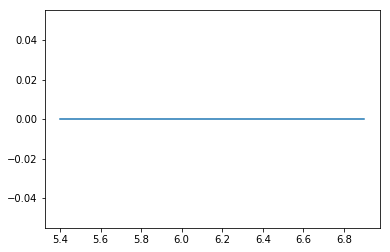

In [19]:
plt.plot(oRTList0[1].oLegList[0].Hedge_Ratio.x,
         oRTList0[1].oLegList[0].Hedge_Ratio.y, 
         label='Discount=-1% leg=4')
plt.plot(oRTList0[1].oLegList[4].Hedge_Ratio.x,
         oRTList0[1].oLegList[4].Hedge_Ratio.y, 
         label='Discount=-1% leg=5')

plt.xlabel('State of Freight Market') 
#plt.ylabel('Optimal Hedge Ratio') 
plt.title('Optimal hedge ratio for each state')
plt.legend(loc='lower right')
plt.show()

## Comparison of time of journeys of the last leg

NameError: name 'oRTList1' is not defined

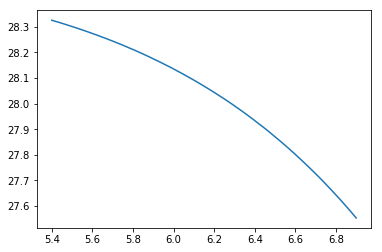

In [17]:
plt.plot(oRTList0[1].oLegList[0].TimeAtSea_Days.x,
         oRTList0[1].oLegList[0].TimeAtSea_Days.y, 
         label='Leg 5 Disc=-1%')
plt.plot(oRTList1[1].oLegList[0].TimeAtSea_Days.x,
         oRTList1[1].oLegList[0].TimeAtSea_Days.y, 
         label='Leg 5 Disc=-2%')
plt.xlabel('State of Freight Market') 
plt.ylabel('Days') 
plt.legend(loc='upper right')
plt.title('Time of trip in days')
plt.show()

## More importance to the volatility of the spot rates 
>eta=0.000001

********* Running CalculateCargoImplicationsData
RoundtripNr:1
LegNr:5


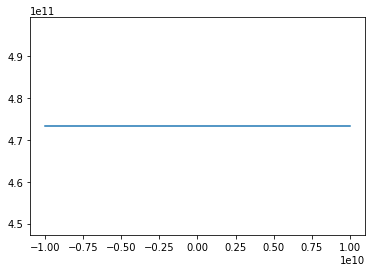

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd7816311d8>
Running optimization for state: 5.6137677745663535
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.633640053394613
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.6535123322228715
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.673384611051131
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.6932568898793905
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.713129168707649
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.733001447535909
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state

1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.607381715979314
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.627253994807573
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.647126273635832
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.666998552464092
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.686870831292351
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-0

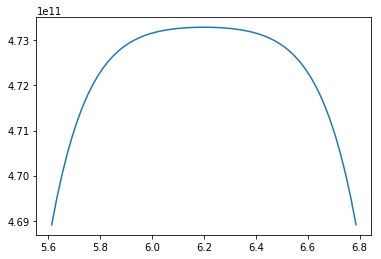

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd781477b88>
Running optimization for state: 5.6137677745663535
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.633640053394613
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.6535123322228715
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.673384611051131
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.6932568898793905
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.713129168707649
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimiza

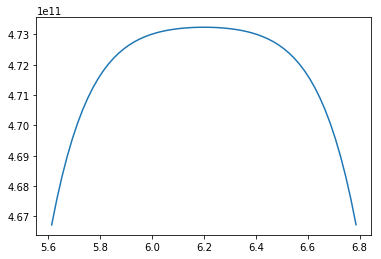

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd783896b88>
Running optimization for state: 5.6137677745663535
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.633640053394613
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.6535123322228715
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.673384611051131
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.6932568898793905
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Ru

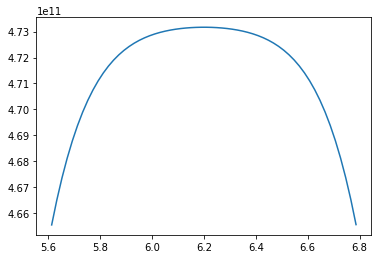

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd781593048>
Running optimization for state: 5.6137677745663535
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.633640053394613
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.6535123322228715
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.673384611051131
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.6932568898793905
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.713129168707649
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06


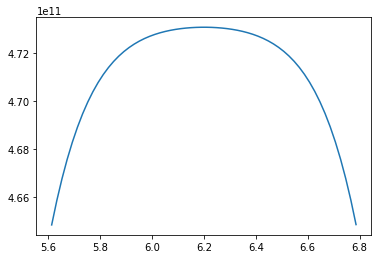

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd78148de58>
Running optimization for state: 5.6137677745663535
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.633640053394613
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.6535123322228715
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.673384611051131
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.6932568898793905
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Ru

1.5e-06
1.5e-06
1.5e-06
0


In [116]:
op2 = Optimization_Problem(oJourney=oJourney, 
                          oShip=oShip, 
                          oPortList=oPortList, 
                          process=OU_process.OU_process(r_bar = 6.2, r_lambda=3, r_sigma=0.3), 
                          ffa=FFA.FFA(fut_curve_slope = -0.02), 
                          eta=0.0000015) 
oRTList2 = op2.run_optimization()

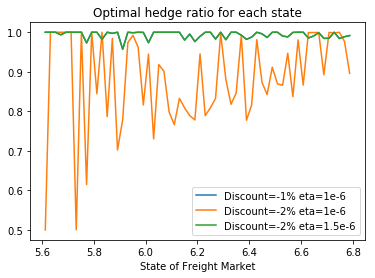

In [117]:
plt.plot(oRTList1[1].oLegList[4].Hedge_Ratio.x,
         oRTList1[1].oLegList[4].Hedge_Ratio.y, 
         label='Discount=-1% eta=1e-6')
plt.plot(oRTList2[1].oLegList[4].Hedge_Ratio.x,
         oRTList2[1].oLegList[4].Hedge_Ratio.y, 
         label='Discount=-2% eta=1e-6')
plt.plot(oRTList1[1].oLegList[4].Hedge_Ratio.x,
         oRTList1[1].oLegList[4].Hedge_Ratio.y, 
         label='Discount=-2% eta=1.5e-6')

plt.xlabel('State of Freight Market') 
#plt.ylabel('Optimal Hedge Ratio') 
plt.title('Optimal hedge ratio for each state')
plt.legend(loc='lower right')
plt.show()

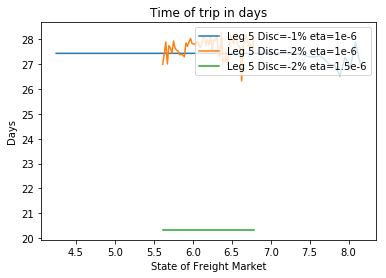

In [118]:
plt.plot(oRTList0[1].oLegList[0].TimeAtSea_Days.x,
         oRTList0[1].oLegList[0].TimeAtSea_Days.y, 
         label='Leg 5 Disc=-1% eta=1e-6')
plt.plot(oRTList1[1].oLegList[0].TimeAtSea_Days.x,
         oRTList1[1].oLegList[0].TimeAtSea_Days.y, 
         label='Leg 5 Disc=-2% eta=1e-6')
plt.plot(oRTList2[1].oLegList[0].TimeAtSea_Days.x,
         oRTList2[1].oLegList[0].TimeAtSea_Days.y, 
         label='Leg 5 Disc=-2% eta=1.5e-6')

plt.xlabel('State of Freight Market') 
plt.ylabel('Days') 
plt.legend(loc='upper right')
plt.title('Time of trip in days')
plt.show()

## Changing paramters of the OU process

> ou_process = OU_process.OU_process(r_bar = 6.2, r_lambda=3, r_sigma=0.3)


********* Running CalculateCargoImplicationsData
RoundtripNr:1
LegNr:5


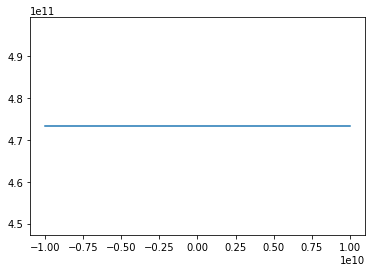

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd7812789a8>
Running optimization for state: 5.6137677745663535
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.633640053394613
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6535123322228715
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.673384611051131
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6932568898793905
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.713129168707649
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.733001447535909
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.752873726364168
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.7727460051924275
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.792618284020686
1e-06
1e-06
1e-06
1

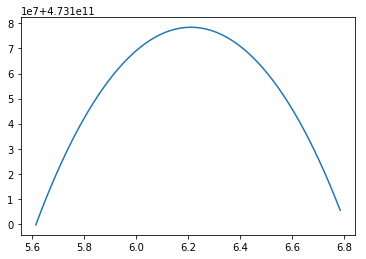

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd7812bbf48>
Running optimization for state: 5.6137677745663535
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.633640053394613
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6535123322228715
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.673384611051131
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6932568898793905
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.713129168707649
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.733001447535909
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.752873726364168
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.7727460051924275
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.792618284020686
1e-06
1e-06
1e-06
1

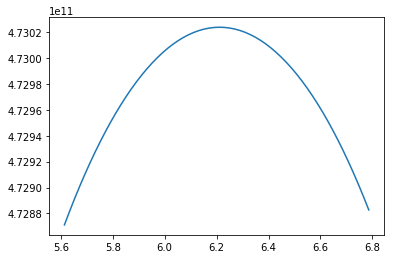

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd7815e37c8>
Running optimization for state: 5.6137677745663535
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.633640053394613
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6535123322228715
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.673384611051131
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6932568898793905
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.713129168707649
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.733001447535909
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.752873726364168
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.7727460051924275
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.792618284020686
1e-06
1e-06
1e-06
1

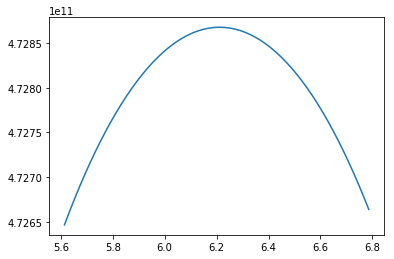

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd7816edf98>
Running optimization for state: 5.6137677745663535
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.633640053394613
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6535123322228715
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.673384611051131
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6932568898793905
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.713129168707649
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.733001447535909
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.752873726364168
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.7727460051924275
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.792618284020686
1e-06
1e-06
1e-06
1

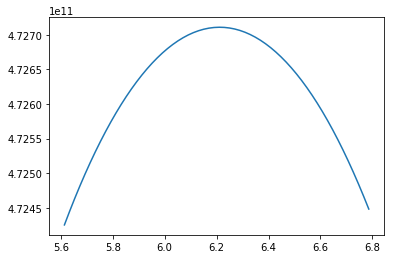

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd783904728>
Running optimization for state: 5.6137677745663535
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.633640053394613
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6535123322228715
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.673384611051131
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6932568898793905
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.713129168707649
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.733001447535909
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.752873726364168
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.7727460051924275
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.792618284020686
1e-06
1e-06
1e-06
1

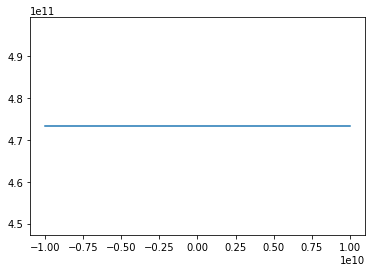

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd783896958>
Running optimization for state: 5.6137677745663535
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.633640053394613
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6535123322228715
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.673384611051131
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6932568898793905
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.713129168707649
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.733001447535909
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.752873726364168
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.7727460051924275
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.792618284020686
1e-06
1e-06
1e-06
1

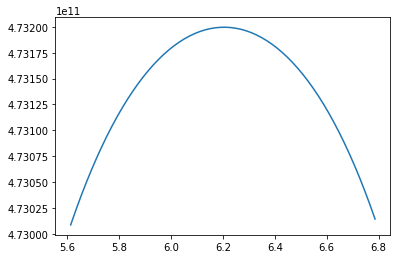

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd7814b3cc8>
Running optimization for state: 5.6137677745663535
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.633640053394613
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6535123322228715
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.673384611051131
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6932568898793905
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.713129168707649
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.733001447535909
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.752873726364168
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.7727460051924275
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.792618284020686
1e-06
1e-06
1e-06
1

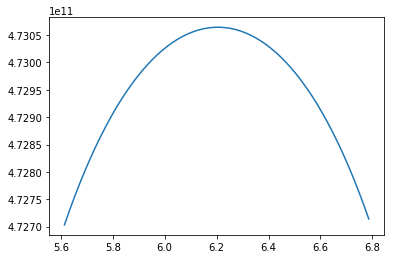

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd7838ebc78>
Running optimization for state: 5.6137677745663535
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.633640053394613
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6535123322228715
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.673384611051131
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6932568898793905
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.713129168707649
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.733001447535909
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.752873726364168
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.7727460051924275
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.792618284020686
1e-06
1e-06
1e-06
1

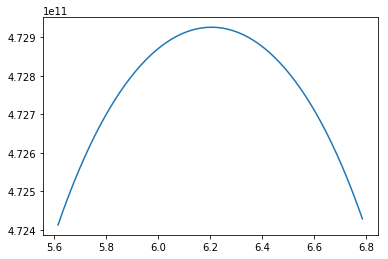

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd781431ef8>
Running optimization for state: 5.6137677745663535
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.633640053394613
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6535123322228715
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.673384611051131
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6932568898793905
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.713129168707649
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.733001447535909
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.752873726364168
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.7727460051924275
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.792618284020686
1

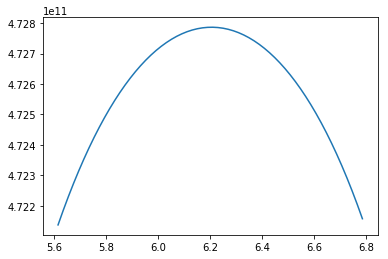

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd7814079f8>
Running optimization for state: 5.6137677745663535
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.633640053394613
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6535123322228715
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.673384611051131
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6932568898793905
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.713129168707649
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.733001447535909
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.752873726364168
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.7727460051924275
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.792618284020686
1e-06
1e-06
1e-06
1

In [119]:
op3 = Optimization_Problem(oJourney=oJourney, 
                          oShip=oShip, 
                          oPortList=oPortList, 
                          process=OU_process.OU_process(r_bar = 6.2, r_lambda=0.5, r_sigma=0.3), 
                          ffa=FFA.FFA(fut_curve_slope = -0.05), 
                          eta=0.000001) 
oRTList3 = op3.run_optimization()

op4 = Optimization_Problem(oJourney=oJourney, 
                          oShip=oShip, 
                          oPortList=oPortList, 
                          process=OU_process.OU_process(r_bar = 6.2, r_lambda=0.8, r_sigma=0.3), 
                          ffa=FFA.FFA(fut_curve_slope = -0.05), 
                          eta=0.000001) 
oRTList4 = op4.run_optimization()

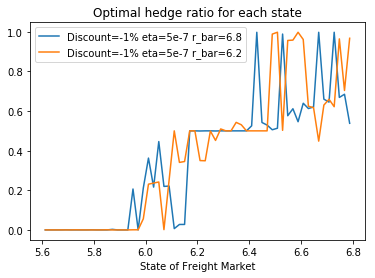

In [120]:
plt.plot(oRTList3[1].oLegList[4].Hedge_Ratio.x,
         oRTList3[1].oLegList[4].Hedge_Ratio.y, 
         label='Discount=-1% eta=5e-7 r_bar=6.8')
plt.plot(oRTList4[1].oLegList[4].Hedge_Ratio.x,
         oRTList4[1].oLegList[4].Hedge_Ratio.y, 
         label='Discount=-1% eta=5e-7 r_bar=6.2')


plt.xlabel('State of Freight Market') 
#plt.ylabel('Optimal Hedge Ratio') 
plt.title('Optimal hedge ratio for each state')
plt.legend(loc='upper left')
plt.show()

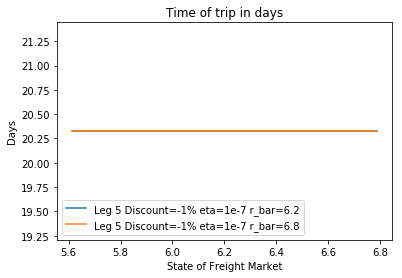

In [121]:
plt.plot(oRTList3[1].oLegList[4].TimeAtSea_Days.x,
         oRTList3[1].oLegList[4].TimeAtSea_Days.y, 
         label='Leg 5 Discount=-1% eta=1e-7 r_bar=6.2')
plt.plot(oRTList4[1].oLegList[4].TimeAtSea_Days.x,
         oRTList4[1].oLegList[4].TimeAtSea_Days.y, 
         label='Leg 5 Discount=-1% eta=1e-7 r_bar=6.8')

plt.xlabel('State of Freight Market') 
plt.ylabel('Days') 
plt.legend(loc='lower left')
plt.title('Time of trip in days')
plt.show()

## Checking if the function is convex

In [122]:
ou_process = OU_process.OU_process(r_bar = 6.2, r_lambda=1.8, r_sigma=0.3)
ffa = FFA.FFA(fut_curve_slope = -0.5)

params = [ou_process.r_bar ,oShip, oPortList, oJourney, ou_process, ffa, 0.00002]

In [123]:
leg = oRTList0[1].oLegList[0]
t_range = np.linspace(leg.TimeAtSeaMin_Days,leg.TimeAtSeaMax_Days,num=100)
h_range = np.linspace(0,1,num=100)
z = np.zeros((100,100))
it = 0
ih = 0
max_z = 0
for t in t_range:
    ih = 0
    for h in h_range:
        z[it,ih],q = leg.CalcGoodwill([h,t],params)
        if z[it,ih]>max_z:
            h_max = h
            t_max = t
            max_z = z[it,ih] 
        ih = ih + 1
    it = it + 1
    

2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-0

2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-0

2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-0

2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-0

2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-0

2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05


In [124]:
print([h_max,t_max,max_z])

[0.686868686868687, 20.32598039215686, 85610406947.11758]


In [126]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
# Read data from a csv
x, y = t_range, h_range
fig = go.Figure(data=[go.Surface(z=z.T, x=x, y=y)])
fig.update_layout(title='Goodwill as a function of time and hedge ratio', autosize=False,
                  width=1000, height=1000,
                  scene = dict(
                    xaxis_title='Time of the leg in days',
                    yaxis_title='Hedge ratio from 0 to 1',
                    zaxis_title='Value of the ship'),
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

RoundtripNr:1
LegNr:1


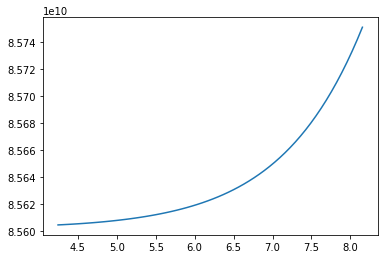

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd7817742c8>
Running optimization for state: 5.6137677745663535
0
0
0
0
0
0
0
Running optimization for state: 5.633640053394613
0
0
0
0
0
0
0
Running optimization for state: 5.6535123322228715
0
0
0
0
0
0
0
Running optimization for state: 5.673384611051131
0
0
0
0
0
0
0
Running optimization for state: 5.6932568898793905
0
0
0
0
0
0
0
Running optimization for state: 5.713129168707649
0
0
0
0
0
0
0
Running optimization for state: 5.733001447535909
0
0
0
0
0
0
0
Running optimization for state: 5.752873726364168
0
0
0
0
0
0
0
Running optimization for state: 5.7727460051924275
0
0
0
0
0
0
0
Running optimization for state: 5.792618284020686
0
0
0
0
0
0
0
Running optimization for state: 5.812490562848946
0
0
0
0
0
0
0
Running optimization for state: 5.832362841677205
0
0
0
0
0
0
0
Running optimization for state: 5.852235120505464
0
0
0
0
0
0
0
Running optimization for state: 5.872107399333723
0
0
0
0
0
0
0
Running optimizatio

In [127]:
leg.FindBestGoodwill(ou_process, ffa, 0, oJourney, oShip, oRTList0, oPortList)

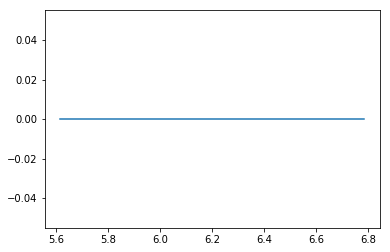

In [128]:
plt.plot(leg.Hedge_Ratio.x,leg.Hedge_Ratio.y)